## Importing Libraries

In [2]:
import random
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt
import warnings
import time
import pickle
warnings.filterwarnings("ignore")

C:\Users\HP\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Loading dataset

In [3]:
# Loading Images to feed into the model of 35x35x1 (Grayscale images)

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

validate_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:\\Users\\HP\\Downloads\\BelgiumTSC_Training\\Training',
                                                 target_size = (35, 35),color_mode = "grayscale",
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_set = test_datagen.flow_from_directory('C:\\Users\\HP\\Downloads\\BelgiumTSC_Testing\\Validation',
                                            target_size = (35, 35),color_mode = "grayscale",
                                            batch_size = 32,
                                            class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('C:\\Users\\HP\\Downloads\\BelgiumTSC_Testing\\Testing',
                                            target_size = (35, 35),color_mode = "grayscale",
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 4575 images belonging to 62 classes.
Found 1277 images belonging to 62 classes.
Found 1243 images belonging to 62 classes.


## Sample of Training data

In [4]:
# Random batch
n=random.randint(1,len(training_set))
for i in range(n):
    img,label=next(training_set)        # Every time variables get new batch of images

In [5]:
def plot(ims,titles=None):
    plt.figure(figsize=(15,15))
    for i in range(len(ims)):
        plt.subplot(8,8,i+1)
        plt.axis('Off')
        if titles is not None:
            plt.title(np.nonzero((titles[i]).tolist())[0][0])
        plt.imshow(ims[i][:,:,0])

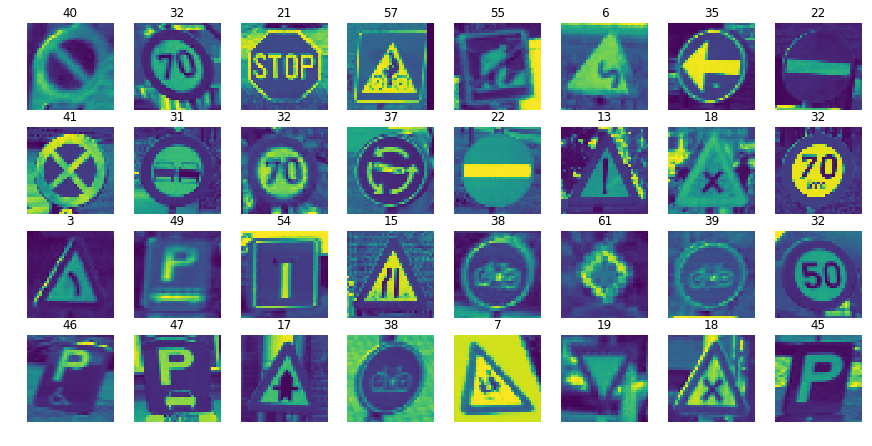

In [6]:
# Sample of a batch of training images

plot(img,titles=label)

## Convolution Neural Network Model

In [7]:
def image_classifier(hx,wy):
    # Initialising the CNN
    classifier = Sequential()

    # Step 1 - Convolution
    classifier.add(Convolution2D(16, 3, 3, input_shape = (hx, wy, 1), activation = 'relu'))

    # Step 2 - Convolution
    classifier.add(Convolution2D(32, 3, 3, input_shape = (hx, wy, 1), activation = 'relu'))

    # Step 3 - Pooling
    classifier.add(MaxPooling2D(pool_size = (2, 2)))

    # Step 4 - Convolution
    classifier.add(Convolution2D(32, 3, 3, input_shape = (hx, wy, 1), activation = 'relu'))

    # Step 5 - Convolution
    classifier.add(Convolution2D(32, 3, 3, input_shape = (hx, wy, 1), activation = 'relu'))

    # Step 6 - Pooling
    classifier.add(MaxPooling2D(pool_size = (2, 2)))

    # Step 7 - Flattening
    classifier.add(Flatten())

    # Step 8 - Full connection
    classifier.add(Dense(output_dim = 1000, activation = 'relu'))

    classifier.add(Dense(output_dim = 62, activation = 'softmax'))

    # Compiling the CNN
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return classifier


In [22]:
def image_classifier_ann(hx,wy):
    # Initialising the CNN
    classifier = Sequential()

    
    # Step 7 - Flattening
    classifier.add(Flatten(input_shape=(hx,wy,1)))

    # Step 8 - Full connection
    classifier.add(Dense(output_dim = 1000, activation = 'relu'))

    classifier.add(Dense(output_dim = 62, activation = 'softmax'))

    # Compiling the CNN
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return classifier


In [23]:
# Input of 35x35 image to image classifier model 

classifier=image_classifier_ann(35,35)

In [24]:
training_set[0][0].shape

(32, 35, 35, 1)

In [25]:
validation_set[0][0].shape

(32, 35, 35, 1)

In [26]:
test_set[0][0].shape

(32, 35, 35, 1)

## Training of Model on Training data

In [27]:
start=time.time()
hist=classifier.fit_generator(training_set,
                         samples_per_epoch = 200,
                         nb_epoch = 50,
                         validation_data = validation_set,
                         nb_val_samples = 100)

Epoch 1/50
6/6 [==============================] - 15s 2s/step - loss: 4.0082 - acc: 0.1458 - val_loss: 3.6525 - val_acc: 0.2323
Epoch 2/50
6/6 [==============================] - 4s 641ms/step - loss: 3.3708 - acc: 0.2670 - val_loss: 3.2402 - val_acc: 0.3698
Epoch 3/50
6/6 [==============================] - 4s 592ms/step - loss: 3.1292 - acc: 0.3125 - val_loss: 3.2214 - val_acc: 0.2862
Epoch 4/50
6/6 [==============================] - 4s 722ms/step - loss: 2.8201 - acc: 0.3958 - val_loss: 2.9965 - val_acc: 0.3247
Epoch 5/50
6/6 [==============================] - 4s 685ms/step - loss: 2.8322 - acc: 0.3906 - val_loss: 2.5770 - val_acc: 0.4224
Epoch 6/50
6/6 [==============================] - 4s 665ms/step - loss: 2.7055 - acc: 0.4010 - val_loss: 2.5223 - val_acc: 0.3967
Epoch 7/50
6/6 [==============================] - 4s 695ms/step - loss: 2.5615 - acc: 0.4427 - val_loss: 2.4877 - val_acc: 0.4508
Epoch 8/50
6/6 [==============================] - 4s 734ms/step - loss: 2.6004 - acc: 0.4323

In [28]:
end=time.time()
print("Execution time : {0} minutes".format((end-start)/60))

Execution time : 4.061955344676972 minutes


## Visualization of loss and accuracy between Training and Validation data

In [37]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [31]:
# Visualization of training and validation loss and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']

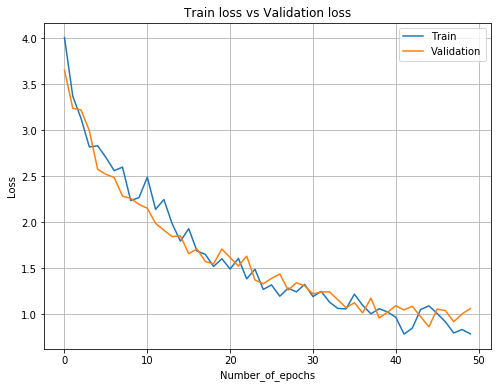

In [32]:
# Train loss vs Validation loss
plt.figure(figsize=(8,6))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number_of_epochs')
plt.ylabel('Loss')
plt.title('Train loss vs Validation loss')
plt.legend(['Train','Validation'])
plt.grid('True')

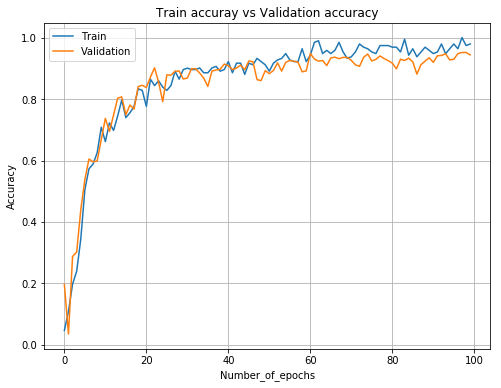

In [16]:
# Train accuracy vs Validation accuracy
plt.figure(figsize=(8,6))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number_of_epochs')
plt.ylabel('Accuracy')
plt.title('Train accuray vs Validation accuracy')
plt.legend(['Train','Validation'])
plt.grid('True')

In [38]:
# load the model from disk
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

## Sample of Test data

In [39]:
# Random batch
n=random.randint(1,len(test_set))
for i in range(n):
    img,label=next(test_set) # Every time variables get new batch of images

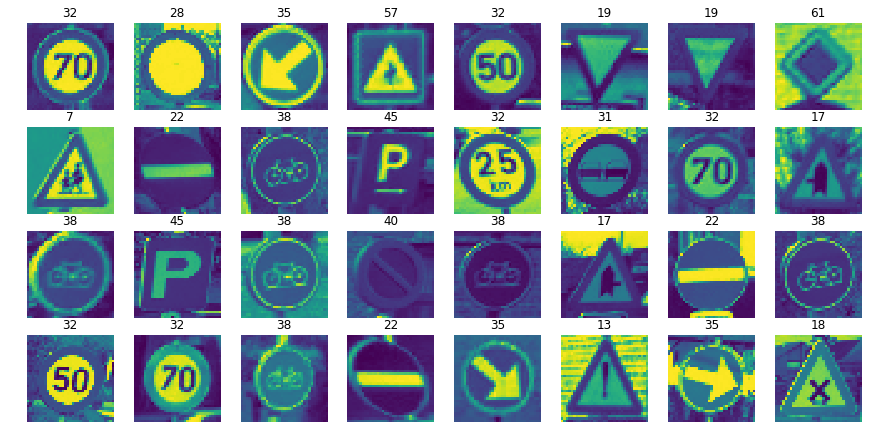

In [40]:
# Sample of a batch of testing images

plot(img,titles=label)

## Testing on Test Sample

In [41]:
# Evaluate the model

scores=loaded_model.evaluate_generator(test_set, steps=len(test_set))
print("Test Loss: {0}   \t Test Accuracy: {1}".format(scores[0],scores[1]))

Test Loss: 1.1455014828032097   	 Test Accuracy: 0.721641190619787


In [42]:
test_labels=np.nonzero(label.tolist())[1].tolist()
image35=img[:,:,:,0]

# Pick 10 random images
sample_indexes = random.sample(range(len(test_labels)), 10)
sample_images = [image35[i] for i in sample_indexes]
sample_labels = [test_labels[i] for i in sample_indexes]

## Prediction on Test Sample

In [43]:
# Run the "predicted_labels" op.

predict=loaded_model.predict(np.asarray(sample_images).reshape((10,35,35,1)))    #For 10 samples images
predicted=[np.argmax(predict[i]) for i in range(10)]                           #For 10 samples images
print("Sample Labels:       {0}".format(sample_labels))
print("Predicted Labels:    {0}".format(predicted))

Sample Labels:       [38, 35, 17, 32, 13, 31, 18, 35, 32, 19]
Predicted Labels:    [40, 35, 17, 32, 13, 31, 18, 38, 32, 19]


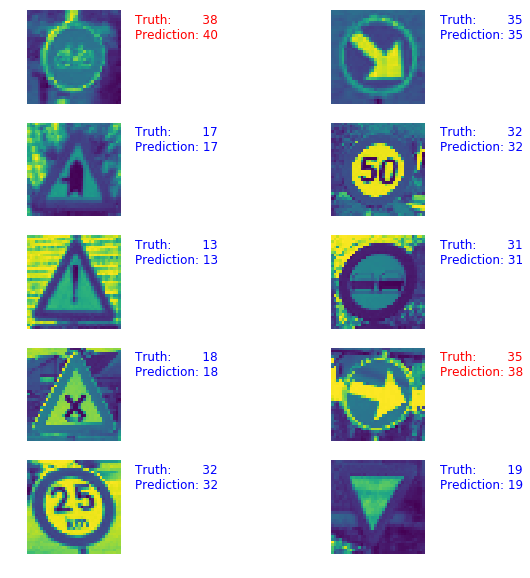

In [44]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='blue' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i])

In [54]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 33, 33, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
__________